<a href="https://colab.research.google.com/github/SantiagoUNAL/Mathematics-for-machine-learning/blob/main/Tarea_SVMBasic_(Santiago_Prieto_Betancur).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


# Implementación de SVM

Optimized a step.
Optimized a step.
Optimized a step.


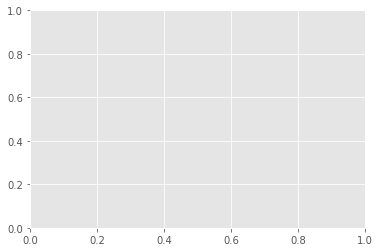

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        # La subclase llama los datos para utilizarlos
        self.data = data
        # { ||w||: [w,b] }
        # El diccionario va a almacenar las parejas [w,b] etiquetadas por la norma de w (||w||) tales que satisfagan que yi(xi.w+b) >= 1
        
        opt_dict = {}

        # El vector de vectores llamado transforms va a ser utilizado para evaluar todas las posibles direcciones que puede tomar un vector w dado. De esta manera, se
        # examinan todas las posibles lineas determinadas por un vector de entrada w.
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        # Se crea temporalmente un arreglo para buscar el número máximo entre todos los datos para usar este valor como un parametro que determine los rangos de operación
        # de todo el programa, así como para fijar cual va a ser el vector w inicial en el programa.
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        # Se determina cual es el valor más pequeño y más grande de todos los datos y despues se vacia el arreglo "all_data" para no ocupar una gran cantidad de memoria.
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        
        # En esta parte se establecen los pasos en los cuales se va a ir variando el vector w para el proceso de optimización.
        # Inicialmente se dan pasos "grandes" hasta llegar a un punto en donde el vector w(i+1) supere al vector w(i) y despues se sigue la iteración con los pasos más pequeños.

        # Esta estrategia de usar pasos que varien el vector w es funcional porque el problema de minimizar la norma de w es un problema de optimización convexa en el cual se sabe
        # que existe un mínimo global de la función
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive

        # En esta parte se establecen las variables que definiran el rango donde variará el escalar b para determinar si cierta escogencia de w 
        # cumple que yi(xi.w+b) >= 1 para todos los datos.

        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w

        # Aquí no es necesario tener la misma precisión de la escogencia de b a diferencia de como se escoge w puesto que el valor de b no tiene muchas restricciones 
        # en la condición yi(xi.w+b) >= 1 lo cual permite ahorrar tiempo de computo. Sin embargo, se desea en la medida de lo posible que para los datos de entrenamiento
        # los valores de b esten sujetos a la condición de frontera yi(xi.w+b) = 1
        b_multiple = 5
        latest_optimum = self.max_feature_value*10 #Este valor sera el que determinara todas las componentes del vector w inicial y en las iteraciones posteriores se ira cambiando

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            # Esta escogencia permite ahorrar tiempo de computo y es razonable puesto que el problema es de optimización convexa.
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                  # En esta parte del código se evalua para cada w los posibles b que puedan satisfacer la restricción yi(xi.w+b) >= 1

                    for transformation in transforms:
                        w_t = w*transformation
                        # Aquí se evalua cada una de las posibles direcciones que puede tomar w
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                # En esta parte se determina si la escogencia particular de w y b satisfacen la restricción yi(xi.w+b) >= 1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            # Una vez encontrada una pareja [w,b] para la cual se satisface la restricción yi(xi.w+b) >= 1, se procede a guardarla en un diccionario
                            # etiquetado por la norma de w para despues poder hacer la busqueda y escoger el w con norma más pequeña
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                # En esta parte se determina cuando el programa llega al final de aplicar la serie de pasos mirando cuando la primera componente del vector w cambia de signo
                # en este caso no importa que componente se mira, porque todas estan definidas igual.
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            # En esta última parte se ordena el diccionario "opt_dict" de tal forma que la primera entrada sea el [w,b] donde w tiene la menor norma (min||w||)
            # y apartir de ahí escoger el nuevo w que va ir cambiando con pasos más pequeños y así ir mejorando la escogencia de w.
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
    # En esta parte se desarrolla la predicción para un conjunto de datos de prueba. Para hacer la clasificación se mira la función sign( x.w+b )
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
# Este es el diccionario que contiene todos los datos de entrenamiento, clasificados por -1 si no tiene la caracteristica en estudio y 1 si tiene la caracteristica en estudio      
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

# Aquí se llama a la clase Support_Vector_Machine() como svm1
svm1 = Support_Vector_Machine()

# Aquí se ejecuta la subclase de entrenamiento de la clase svm1 usando los datos de entrenamiento definidos en el diccionario "data_dict"
svm1.fit(data_dict)


In [ ]:
svm1.predict([7,3.5])

1.0

# Respuestas de las preguntas

1) Este tipo de problema corresponde a aprendizaje de maquina supervisado puesto que los vectores de caracteristicas estan etiquetados en cada uno de los datasets en las clases 1 o -1.

2) En el primer dataset (https://archive.ics.uci.edu/ml/datasets/banknote+authentication) se tiene una serie de datos que provienen de imagenes que fueron tomadas para la evaluación de un procedimiento de autenticación de billetes, es decir son datos tomados de especimenes de billetes genuinos y falsos. Para determinar el vector de caracteristicas se usó como herramienta la transformada ondícula (Wavelet Transform) que permite extraer caracteristicas de las imagenes tomadas de los distintos billetes.

Para usar esta herramienta se hace uso de la transformada ondícula integral definida como
$$[W_{ψ}f](a,b) = \frac{1}{\sqrt{|a|}} \int_{-∞}^{∞}\overline{ψ\left(\frac{x-b}{a}\right)}f(x)dx$$
donde $ψ \in L^{2}(\mathbb{R})$ es una función llamada ondícula ortonormal (orthonormal wavelet) que es usada para definir una base de Hilbert, que es un sistema completo ortonormal, para el espacio de Hilbert $L^{2}(\mathbb{R})$ de las funciones cuadrado integrables.

Las caracteristicas que definen cada una de las componentes del vector de caracteristicas son las siguientes:

- Primera componente: Diferencia de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Segunda componente: Asimetría de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Tercera componente: Curtosis de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Cuarta componente: Entropía de la imagen - (continua)
- Quinta componente: Clase - (número entero 0 si es falso o 1 si es real)


En el segundo dataset (https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+) se tiene una serie de datos que establecen la ocupación de la tierra de fotos con sello de tiempo que fueron tomadas cada minuto. Estos datos experimentales fueron usados para clasificación binaria (ocupación de una habitación).

Las caracteristicas que definen cada una de las componentes del vector de caracteristicas son las siguientes:

- Primera componente: Fecha y hora (año-mes-día hora:minutos:segundos)
- Segunda componente: Temperatura en Celsius
- Tercera componente: Humedad relativa (Porcentaje - %)
- Cuarta componente: Luz en Lux
- Quinta componente: CO2 en ppm (Partes por millón)
- Sexta componente: Tasa de humedad, cantidad derivada de la temperatura y la humedad relativa en $\frac{[kg(vapor \; de \; agua)]}{[kg(aire)]}$
- Septima componente: Ocupación, 0 ó 1, 0 para no ocupado y 1 para el estado de ocupado.


3) a) Para ver que estos datasets originalmente tienen un alto grado de ser linealmente separables usaremos el algoritmo del perceptron. Para la primera base de datos (Banknote authentication Data Set) tenemos que el algoritmo del perceptron es el siguiente:


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-16, max_iter = 10000)

clf.fit(df[[0,1,2,3]],df[4])

y_pred = clf.predict(df[[0,1,2,3]])

print(classification_report(df[4], y_pred, target_names = ['Clase Positiva (1)', 'Clase Negativa (-1)']))

print(np.linalg.norm(df[4] - y_pred, ord = 1))

                     precision    recall  f1-score   support

 Clase Positiva (1)       0.99      0.99      0.99       762
Clase Negativa (-1)       0.98      0.99      0.99       610

           accuracy                           0.99      1372
          macro avg       0.99      0.99      0.99      1372
       weighted avg       0.99      0.99      0.99      1372

16.0


De esta manera, tenemos que es altamente probable que esta base de datos es linealmente separable puesto que el perceptron converge en un porcentaje muy alto.

Para la segunda base de datos (Occupancy Detection Data Set) tenemos que el algoritmo del perceptron es el siguiente:

In [ ]:
import requests, zipfile, io

r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))

f1 = z.open("datatest.txt")
df1 = pd.read_csv(f1, sep =',')

f2 = z.open("datatest2.txt")
df2 = pd.read_csv(f2, sep =',')


f3 = z.open("datatraining.txt")
df3 = pd.read_csv(f3, sep =',')

df4 = pd.concat([df1, df2, df3])

In [ ]:
clf2 = Perceptron(tol=1e-10, max_iter = 10000)

X = df4[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
clf2.fit(X,df4['Occupancy'])

y_pred = clf2.predict(X)

print(classification_report(df4['Occupancy'], y_pred, target_names = ['clase1', 'clase2']))

print(np.linalg.norm(df4['Occupancy'] - y_pred, ord = 1))

              precision    recall  f1-score   support

      clase1       1.00      0.95      0.98     15810
      clase2       0.87      1.00      0.93      4750

    accuracy                           0.96     20560
   macro avg       0.93      0.98      0.95     20560
weighted avg       0.97      0.96      0.97     20560

732.0


De la misma manera que el caso anterior tenemos que es altamente probable que esta base de datos es linealmente separable puesto que el perceptron converge en un porcentaje muy alto.

b) En general se puede conjeturar que estos datos no estan aleatoreamente escogidos puesto que en ambos casos, como se pudo evidenciar en los algoritmos anteriores, se tiene que es muy probable que exista una forma clara de separación de los datos por lo que estos tienen reglas de asociación entre ellos. Ademas estos datos provienen de

c) Estas bases de datos tienen un tamaño suficiente para garantizar generalización como se vera más adelante en la implementación, puesto que estas bases de datos poseen muchos más datos de entrenamiento que parametros a determinar en el SVM. Ademas dentro de la implemetación se tiene que en el proceso de optimización al minimizar la norma del vector $\vec{w}$ se tiene que se está maximizando la distancia de la frontera de decisión de los datos lo cual provee un mecanismo de generalización dentro del programa. 

4) En esta parte vamos a dar una explicación del cómo y por qué el código que implementa el SVM funciona. En la primera sección del código lo que se hace es exportar los paquetes de Python necesarios para poder realizar las operaciones o uso de funciones necesarias para desarrollar la implementación. Para esto se crea una clase llamada "Support_Vector_Machine" que en un principio ejecuta la clase gráficando una figura vacia. Como se muestra a continuación:



```
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
```



La siguiente porción de la clase "Support_Vector_Machine" va a ser la encargada del entrenamiento de la máquina usando los datos de entrenamiento. En esta parte se definen los pasos que se toman para ir variando el vector $\vec{w}$ y $b$, así como todas las posibles direcciones que puede tomar el vector $\vec{w}$ definiendo en cada caso hiperplanos distintos. Tambien en esta parte se determina si el vector $\vec{w}$ y el valor $b$ cumplen en cada caso la condición $y_{i}(w\cdot x_{i} + b) \geq 1$ para todos los vectores de caracteristicas $\{(x_{i},y_{i})\}_{i=1}^{N}$ que se usan para entrenar al SVM.



```
# train
    def fit(self, data):
        # La subclase llama los datos para utilizarlos
        self.data = data
        # { ||w||: [w,b] }
        # El diccionario va a almacenar las parejas [w,b] etiquetadas por la norma de w (||w||) tales que satisfagan que yi(xi.w+b) >= 1
        
        opt_dict = {}

        # El vector de vectores llamado transforms va a ser utilizado para evaluar todas las posibles direcciones que puede tomar un vector w dado. De esta manera, se
        # examinan todas las posibles lineas determinadas por un vector de entrada w.
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        # Se crea temporalmente un arreglo para buscar el número máximo entre todos los datos para usar este valor como un parametro que determine los rangos de operación
        # de todo el programa, así como para fijar cual va a ser el vector w inicial en el programa.
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        # Se determina cual es el valor más pequeño y más grande de todos los datos y despues se vacia el arreglo "all_data" para no ocupar una gran cantidad de memoria.
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        
        # En esta parte se establecen los pasos en los cuales se va a ir variando el vector w para el proceso de optimización.
        # Inicialmente se dan pasos "grandes" hasta llegar a un punto en donde el vector w(i+1) supere al vector w(i) y despues se sigue la iteración con los pasos más pequeños.

        # Esta estrategia de usar pasos que varien el vector w es funcional porque el problema de minimizar la norma de w es un problema de optimización convexa en el cual se sabe
        # que existe un mínimo global de la función
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive

        # En esta parte se establecen las variables que definiran el rango donde variará el escalar b para determinar si cierta escogencia de w 
        # cumple que yi(xi.w+b) >= 1 para todos los datos.

        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w

        # Aquí no es necesario tener la misma precisión de la escogencia de b a diferencia de como se escoge w puesto que el valor de b no tiene muchas restricciones 
        # en la condición yi(xi.w+b) >= 1 lo cual permite ahorrar tiempo de computo. Sin embargo, se desea en la medida de lo posible que para los datos de entrenamiento
        # los valores de b esten sujetos a la condición de frontera yi(xi.w+b) = 1
        b_multiple = 5
        latest_optimum = self.max_feature_value*10 #Este valor sera el que determinara todas las componentes del vector w inicial y en las iteraciones posteriores se ira cambiando

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            # Esta escogencia permite ahorrar tiempo de computo y es razonable puesto que el problema es de optimización convexa.
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                  # En esta parte del código se evalua para cada w los posibles b que puedan satisfacer la restricción yi(xi.w+b) >= 1

                    for transformation in transforms:
                        w_t = w*transformation
                        # Aquí se evalua cada una de las posibles direcciones que puede tomar w
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                # En esta parte se determina si la escogencia particular de w y b satisfacen la restricción yi(xi.w+b) >= 1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            # Una vez encontrada una pareja [w,b] para la cual se satisface la restricción yi(xi.w+b) >= 1, se procede a guardarla en un diccionario
                            # etiquetado por la norma de w para despues poder hacer la busqueda y escoger el w con norma más pequeña
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                # En esta parte se determina cuando el programa llega al final de aplicar la serie de pasos mirando cuando la primera componente del vector w cambia de signo
                # en este caso no importa que componente se mira, porque todas estan definidas igual.
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            # En esta última parte se ordena el diccionario "opt_dict" de tal forma que la primera entrada sea el [w,b] donde w tiene la menor norma (min||w||)
            # y apartir de ahí escoger el nuevo w que va ir cambiando con pasos más pequeños y así ir mejorando la escogencia de w.
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
```



La siguiente parte corresponde a la subclase que permite realizar la predicción de nuevos datos. En particular, de aquellos que no tienen una etiqueta definida.



```
# En esta parte se desarrolla la predicción para un conjunto de datos de prueba. Para hacer la clasificación se mira la función sign( x.w+b )
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
```



Finalmente, el código almacena los datos de entrenamiento en un diccionario y llama a la clase "Support_Vector_Machine" por svm1 para entrenarlo con los datos definidos en el diccionario.



```
# Este es el diccionario que contiene todos los datos de entrenamiento, clasificados por -1 si no tiene la caracteristica en estudio y 1 si tiene la caracteristica en estudio      
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

# Aquí se llama a la clase Support_Vector_Machine() como svm1
svm1 = Support_Vector_Machine()

# Aquí se ejecuta la subclase de entrenamiento de la clase svm1 usando los datos de entrenamiento definidos en el diccionario "data_dict"
svm1.fit(data_dict)
```



A continuación resolveremos las preguntas 5) y 6) en los distintos datasaets en donde mostraremos como la implementación del programa SVM funciona bajo ciertas restricciones y como este a su vez permite dar evidencia cuantitativa de que los resultados generalizan el problema de clasificación trabajado por la SVM.

# Implementación para la primera base de datos (Banknote authentication Data Set)

Para poder implementar el código se introdujo una tolerancia para la cual la SVM puede fallar en algunos datos. Sin embargo, como se vera a continuación esto sigue proveyendo buenos resultados.

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

style.use('ggplot')

class Support_Vector_Machine_1:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1,1,1],
                      [1,1,1,-1],
                      [1,1,-1,1],
                      [1,1,-1,-1],
                      [1,-1,1,1],
                      [1,-1,1,-1],
                      [1,-1,-1,1],
                      [-1,1,1,1],
                      [-1,1,1,-1],
                      [-1,1,-1,1],
                      [-1,1,-1,-1],
                      [-1,-1,1,1],
                      [-1,-1,1,-1],
                      [-1,-1,-1,1],
                      [-1,-1,-1,-1],
                      [1,-1,-1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        all_data = []


        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        tolerance = 0.03
        total_data = self.data[1].shape[0] + self.data[-1].shape[0]

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum,latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        misses = 0
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    misses = misses + 1
                                    # found_option = False
                        
                        rate = misses/total_data
                        if rate > tolerance:
                          found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            print(norms)
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification

    def predict_vector(self, X):
        #X is a set of data, predict_vector is an array with the predictions
        len_data = X.shape[0]
        y = np.zeros(len_data)
        for i in range(len_data):
          y[i] = self.predict(X[i])
        return np.array(y)

En esta parte se importan los datos para poder crear el diccionario que entrenara la SVM. Para esto se toma una muestra aleatoria del $80 \%$ de los datos y se toma el restante $20 \%$ de los datos para realizar predicciones y comprobar que la SVM generaliza los datos.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

percentage_sample = 0.8
sample_size = df.shape[0]

x_train, x_test, y_train, y_test = train_test_split(
    df[[0,1,2,3]],
    df[4],
    test_size=0.2,
    stratify=df[4],
    random_state=24,
)


positive_class = x_train.loc[df[4] == 1]
# positive_class = positive_class.sample(int(sample_size*percentage_sample))
positive_class = positive_class[[0,1,2,3]].to_numpy()
negative_class = x_train.loc[df[4] == 0]
# negative_class = negative_class.sample(int(sample_size*percentage_sample))
negative_class = negative_class[[0,1,2,3]].to_numpy()


training_data_dict = {1 : positive_class,
        -1: negative_class}

Optimized a step.
[107.56439999999984, 121.90631999999985]
Optimized a step.
[100.39343999999984, 107.56439999999984, 121.90631999999985]
Optimized a step.
[99.67634399999984, 100.39343999999984, 107.56439999999984, 121.90631999999985]


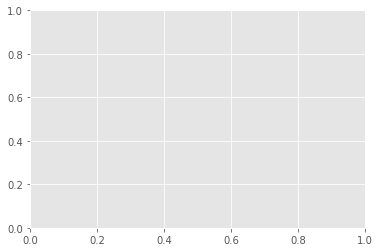

In [ ]:
svm_1 = Support_Vector_Machine_1()
svm_1.fit(training_data_dict)

En esta parte se evalua la precisión de la SVM prediciendo los datos de prueba y así poder medir el desempeño del programa generalizando los datos.

In [ ]:
y_pred = svm_1.predict_vector(x_test.to_numpy())
y_test1 = np.where(y_test < 1, -1, 1)
print(classification_report(y_test1, y_pred, target_names = ['Clase Positiva (1)', 'Clase Negativa (-1)']))

                     precision    recall  f1-score   support

 Clase Positiva (1)       0.99      0.93      0.96       153
Clase Negativa (-1)       0.92      0.98      0.95       122

           accuracy                           0.96       275
          macro avg       0.95      0.96      0.96       275
       weighted avg       0.96      0.96      0.96       275



Aquí podemos ver como la SVM logra tener una precisión general del $95 \% $ prediciendo los datos de prueba, mostrandonos que este data set es en un alto porcentaje linealmente separable salvo algunos outliers. Sin embargo, cabe resaltar que hay un mayor sesgo prediciendo aquellos datos de la clase negativa lo cual puede ser producto de que la frontera de decisión no esta muy bien definida. Sin embargo, el SVM logra generalizar el comportamiento de los datos al $20 \%$ de los datos que no se utilizaron en el entrenamiento de la máquina.

# Implementación para la segunda base de datos (Occupancy Detection Data Set)

Para poder implementar el código se introdujo una tolerancia para la cual la SVM puede fallar en algunos datos. Sin embargo, como se vera a continuación esto sigue proveyendo buenos resultados.

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import requests, zipfile, io

style.use('ggplot')

class Support_Vector_Machine_2:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1,1,1,1],
                      [1,1,1,1,-1],
                      [1,1,1,-1,1],
                      [1,1,1,-1,-1],
                      [1,1,-1,1,1],
                      [1,1,-1,1,-1],
                      [1,1,-1,-1,1],
                      [1,1,-1,-1,-1],
                      [1,-1,1,1,1],
                      [1,-1,1,1,-1],
                      [1,-1,1,-1,1],
                      [1,-1,1,-1,-1],
                      [1,-1,-1,1,1],
                      [1,-1,-1,1,-1],
                      [1,-1,-1,-1,1],
                      [-1,1,1,1,1],
                      [-1,1,1,1,-1],
                      [-1,1,1,-1,1],
                      [-1,1,1,-1,-1],
                      [-1,1,-1,1,1],
                      [-1,1,-1,1,-1],
                      [-1,1,-1,-1,1],
                      [-1,1,-1,-1,-1],
                      [-1,-1,1,1,1],
                      [-1,-1,1,1,-1],
                      [-1,-1,1,-1,1],
                      [-1,-1,1,-1,-1],
                      [-1,-1,-1,1,1],
                      [-1,-1,-1,1,-1],
                      [-1,-1,-1,-1,1],
                      [-1,-1,-1,-1,-1],
                      [1,-1,-1,-1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01]
                      # point of expense:
                      # self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        tolerance = 0.2
        total_data = self.data[1].shape[0] + self.data[-1].shape[0]

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum,latest_optimum,latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..

                        misses = 0
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    misses = misses + 1
                                    rate = misses/total_data
                                    if rate > tolerance:
                                        found_option = False
                                        break
                                      
                                    # found_option = False
                        
                        # rate = misses/total_data
                        # if rate > tolerance:
                          # found_option = False

                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            print(norms)
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
    
    def predict_vector(self, X):
        #X is a set of data, predict_vector is an array with the predictions
        len_data = X.shape[0]
        y = np.zeros(len_data)
        for i in range(len_data):
          y[i] = self.predict(X[i])
        return np.array(y)

A continuación se extraen los distintos archivos de la carpeta Zip del data set de "Detección de ocupación". Inicialmente se extrae el archivo "datatraining.txt" para poder formar el diccionario que tendra los datos de entrenamiento.

In [ ]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

f1 = z.open("datatraining.txt")
df1 = pd.read_csv(f1, sep=",")

percentage_sample = 0.01
sample_size = df1.shape[0]

positive = df1.loc[df1["Occupancy"] == 1]
negative = df1.loc[df1["Occupancy"] == 0]

training_positive = positive.iloc[:, 1:6]
# positive_arr = training_positive.to_numpy()

training_positive_2 = training_positive.sample(int(training_positive.shape[0]*percentage_sample))
positive_arr_2 = training_positive_2.to_numpy()

training_negative = negative.iloc[:, 1:6]
# negative_arr = training_negative.to_numpy()

training_negative_2 = training_negative.sample(int(training_negative.shape[0]*percentage_sample))
negative_arr_2 = training_negative_2.to_numpy()



training_data_dict_2 = {-1:negative_arr_2,
                      1:positive_arr_2}

Optimized a step.
[438.7724388848927, 438.7724388848998, 877.5448777697961, 1316.3173166546924, 1755.0897555395886]
Optimized a step.
[43.877243888486454, 87.75448777697608, 131.6317316654657, 175.50897555395534, 219.38621944244497, 263.2634633309346, 307.1407072194242, 351.01795110791386, 394.89519499640346, 438.7724388848927, 438.7724388848931, 438.7724388848998, 482.6496827733827, 526.5269266618724, 570.404170550362, 614.2814144388516, 658.1586583273413, 702.0359022158309, 745.9131461043205, 789.7903899928101, 833.6676338812997, 877.5448777697894, 877.5448777697961, 921.422121658279, 965.2993655467687, 1009.1766094352582, 1053.053853323748, 1096.9310972122375, 1140.8083411007271, 1184.6855849892167, 1228.5628288777064, 1272.4400727661957, 1316.3173166546853, 1316.3173166546924, 1755.0897555395886]


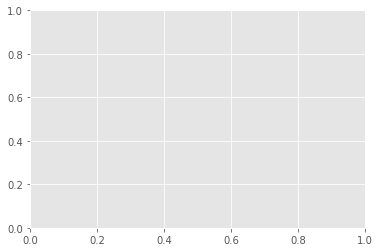

In [ ]:
svm_2 = Support_Vector_Machine_2()
svm_2.fit(training_data_dict_2)

En la parte siguiente se exportan los archivos que se van a utilizar para hacer las predicciones y poder medir posteriormente el grado de precisión del SVM para este data set de "Detección de ocupación".

In [ ]:
f2 = z.open("datatest.txt")
df2 = pd.read_csv(f2, sep =',')

f3 = z.open("datatest2.txt")
df3 = pd.read_csv(f3, sep =',')

df4 = pd.concat([df2, df3])

positive = df4.loc[df4["Occupancy"] == 1]
negative = df4.loc[df4["Occupancy"] == 0]

predict_positive = positive.iloc[:, 1:6]
positive_arr = predict_positive.to_numpy()

predict_negative = negative.iloc[:, 1:6]
negative_arr = predict_negative.to_numpy()

predict = df4.iloc[:, 1:6]
predict_array = predict.to_numpy()

y_test = df4.iloc[:,6]
y_test_arr = y_test.to_numpy()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y_pred2 = svm_2.predict_vector(predict_array)
y_test2 = np.where(y_test_arr < 1, -1, 1)
print(classification_report(y_test2, y_pred2, target_names = ['Clase Ocupado (1)', 'Clase No Ocupado (-1)']))

                       precision    recall  f1-score   support

    Clase Ocupado (1)       0.84      0.97      0.90      9396
Clase No Ocupado (-1)       0.82      0.41      0.54      3021

             accuracy                           0.83     12417
            macro avg       0.83      0.69      0.72     12417
         weighted avg       0.83      0.83      0.81     12417



Aquí podemos ver como la SVM logra tener una precisión general del $83 \% $ prediciendo los datos de prueba, mostrandonos que este data set es en un alto porcentaje linealmente separable salvo algunos outliers. Sin embargo, cabe resaltar que hay un mayor sesgo prediciendo aquellos datos de la clase negativa lo cual puede ser producto de que la frontera de decisión no esta muy bien definida. Aquí hay que hacer la salvedad de que esta precisión corresponde a tan solo tomar el $1 \%$ de los datos en "datatraining.txt" y usarlos para entrenar el SVM. Sin embargo, a pesar de la baja cantidad de datos en el entrenamiento podemos apreciar un gran desempeño del programa prediciendo los nuevos datos.

Por otra parte, si utilizamos la libreria scikit-learn para entrenar estos datos con la implementación del SVM de dicha libreria podemos observar que la separación de los datos por un hiperplano tiene un gran porcentaje de precisión, como se puede observar a continuación:

In [ ]:
from sklearn import svm
X = df1.iloc[:, 1:6].to_numpy()
y = df1.iloc[:, 6].to_numpy()
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(predict_array)
print(y)

[1 1 1 ... 1 1 1]


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_arr, y_pred))


Accuracy: 0.989530482403157
